In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [39]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0)
df.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


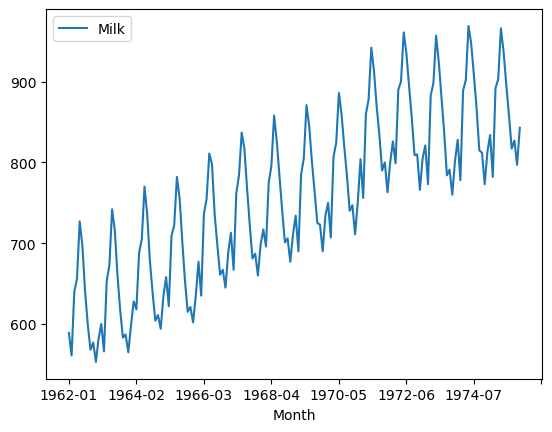

In [40]:
df.plot()
plt.show()

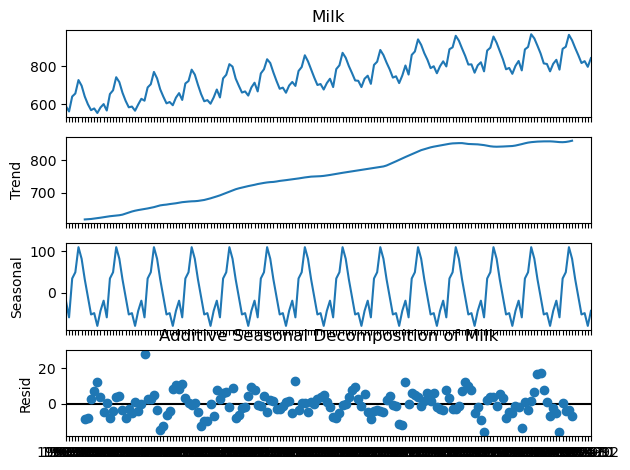

In [41]:
result = seasonal_decompose(df['Milk'], model='additive', period=12)
result.plot()
plt.title('Additive Seasonal Decomposition of Milk')
plt.show()

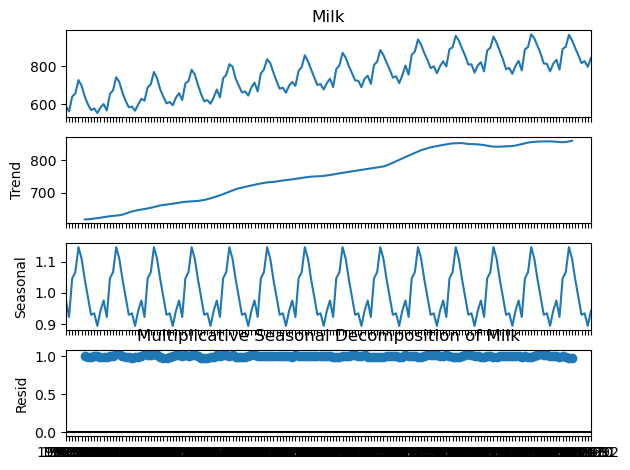

In [42]:
result = seasonal_decompose(df['Milk'], model='multiplicative', period=12)
result.plot()
plt.title('Multiplicative Seasonal Decomposition of Milk')
plt.show()

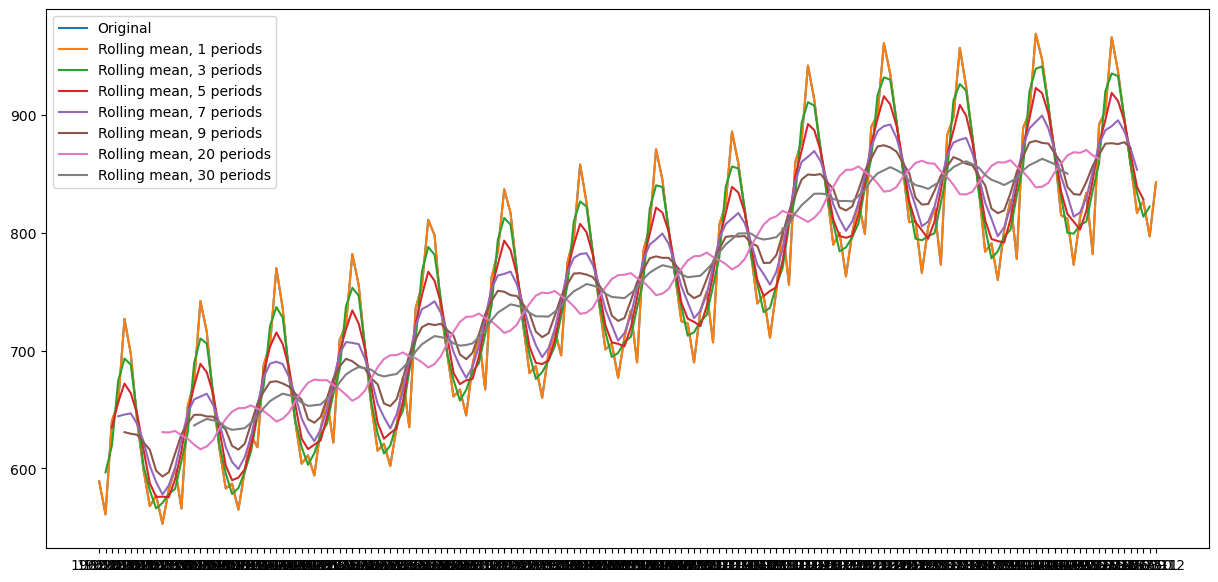

In [43]:
plt.figure(figsize=(15,7))
plt.plot(df['Milk'], label='Original')
for i in [1, 3, 5, 7, 9, 20, 30]:
    rolling = df.rolling(window=i, center=True).mean()
    plt.plot(rolling, label=f'Rolling mean, {i} periods')
plt.legend(loc='best')
plt.show()

In [44]:
mp = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\monthly-milk-production-pounds-p.csv')
y = mp['Milk']

y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (36,))

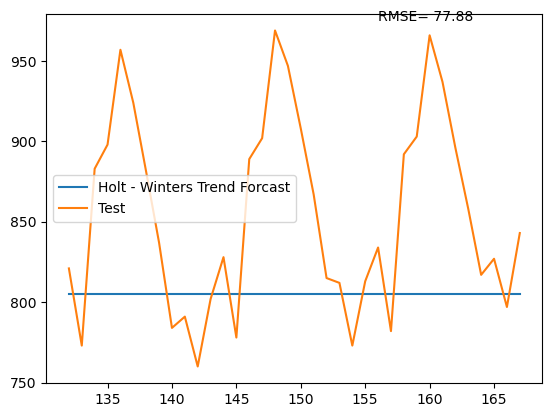

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing



holt_winters = ExponentialSmoothing(y_train)
fit = holt_winters.fit()
fcast = fit.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast, index= y_test.index)

plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.legend(loc = 'best')
plt.show()

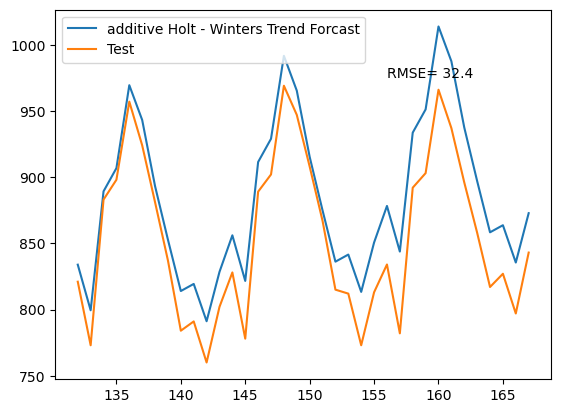

In [46]:
# Add HW 
holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit4 = holt_winters.fit()
fcast4 = fit4.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'additive Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

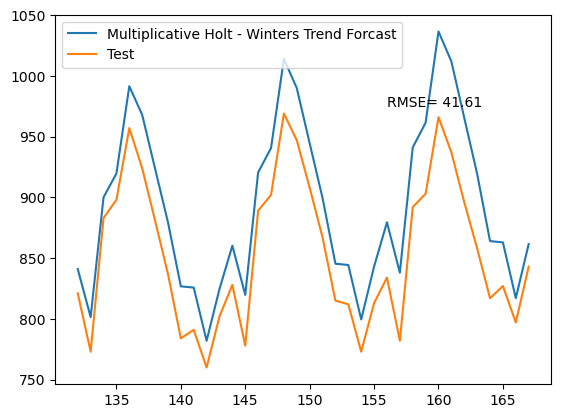

In [47]:
# Mul HW
holt_winters_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul')
fit5 = holt_winters_mul.fit()
fcast5 = fit5.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast5, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'Multiplicative Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

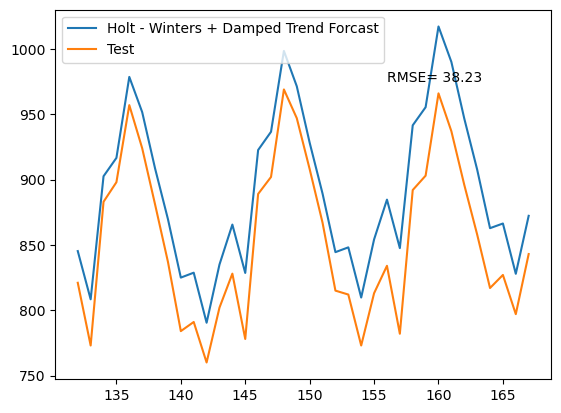

In [48]:
# Damp + HW + Add
alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add',damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

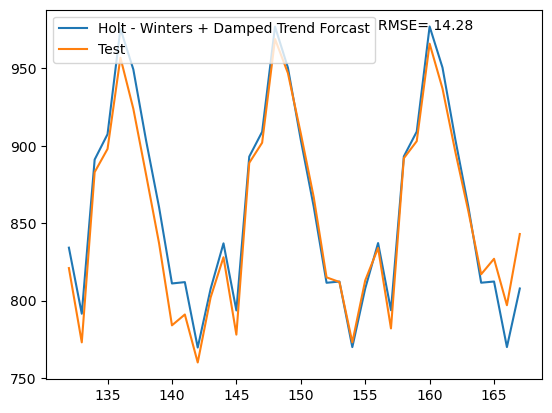

In [49]:
# Damp + HW + mul
alpha, beta, gamma = 0.2, 0.5, 0.3
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul', damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [50]:
mp = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0)
y = mp['Milk']


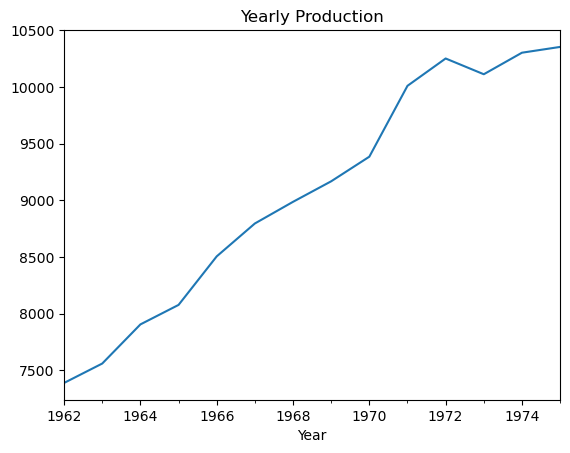

In [51]:
y.index = pd.DatetimeIndex(y.index).to_period('M')
type(y.index)


y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year',inplace=True)
y_yearly.plot()
plt.title("Yearly Production")
plt.show()

In [58]:
y_train = y_yearly[:11]
y_test = y_yearly[11:]
y_train.shape, y_test.shape

((11,), (3,))

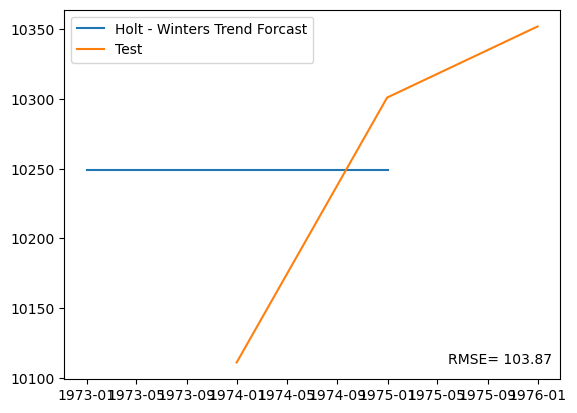

In [61]:
holt_winters = ExponentialSmoothing(y_train)
fit = holt_winters.fit()
fcast = fit.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast, index= y_test.index)
holt_winters_fcast.index = holt_winters_fcast.index.to_timestamp()

plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)

plt.text(1973, 10110, 'RMSE= '+str(error))
plt.legend(loc = 'best')
plt.show()

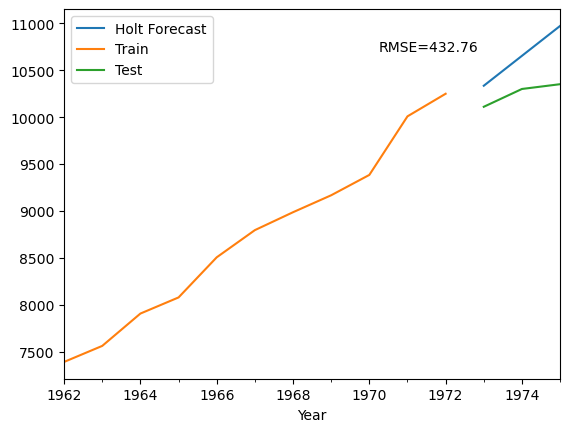

In [ ]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

holt = Holt(y_train)

# Set alpha and beta values
alpha, beta = 0.2, 0.4

# Fit the model
fit = holt.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)


# Forecast
fcast = fit.forecast(len(y_test))

# Convert forecast to pandas Series
holt_fcast = pd.Series(fcast, index=y_test.index)

# Calculate RMSE
error = round(sqrt(mean_squared_error(y_test, holt_fcast)), 2)

# Plot results
holt_fcast.plot(label='Holt Forecast')
y_train.plot(label='Train')
y_test.plot(label='Test')

# Display RMSE on plot
plt.text(0.25, 10700, "RMSE=" + str(error))

plt.legend(loc='best')
plt.show()


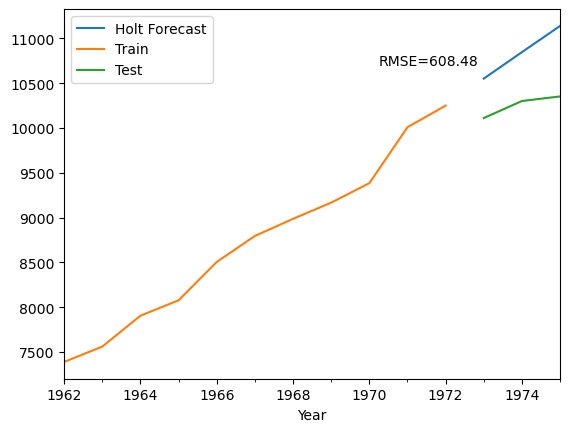

In [72]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

holt = Holt(y_train, damped_trend=True)

# Fit the model
fit = holt.fit()


# Forecast
fcast = fit.forecast(len(y_test))

# Convert forecast to pandas Series
holt_fcast = pd.Series(fcast, index=y_test.index)

# Calculate RMSE
error = round(sqrt(mean_squared_error(y_test, holt_fcast)), 2)

# Plot results
holt_fcast.plot(label='Holt Forecast')
y_train.plot(label='Train')
y_test.plot(label='Test')

# Display RMSE on plot
plt.text(0.25, 10700, "RMSE=" + str(error))

plt.legend(loc='best')
plt.show()
